In [313]:
# Data processing libraries
import pandas as pd
import numpy as np

# Data visualization and animation
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import Axes3D

# Parameters to make more beautiful the plots
plt.rcParams.update({'mathtext.default':'regular'}) # Latex in text
sns.set(context='paper', style='whitegrid', font='Times New Roman', font_scale=1)

In [314]:
# Read the data
with open('../LAMMPS_files/FeOH3-3-rdf.dat','r') as fout:
    text = fout.read()
# Create an empty list with the radial distribution functions
rdf_list=[]
# Separate each element of the text
for j, element in enumerate(text.split(' 100\n')[1:]):
    # Append the values of the rdf as dataframes
    df = pd.DataFrame([i.split(' ')for i in element.split('\n')], dtype=float,
                columns = ['Num','D',
                              'gr11','int_gr11',
                              'gr22','int_gr22',
                              'gr33', 'int_gr33',
                              'gr12','int_gr12',
                              'gr13','int_gr13',
                              'gr23', 'int_gr23',])
    try:
        df['time'] = 200*j*np.ones(df.shape[0])
        rdf_list.append(df[:99])
    except:
        rdf_list.append(df[:99])
# Create a 'z' axis, depending on the time
zs = np.linspace(200,5000,len(rdf_list))*0.7/1000

<IPython.core.display.Javascript object>


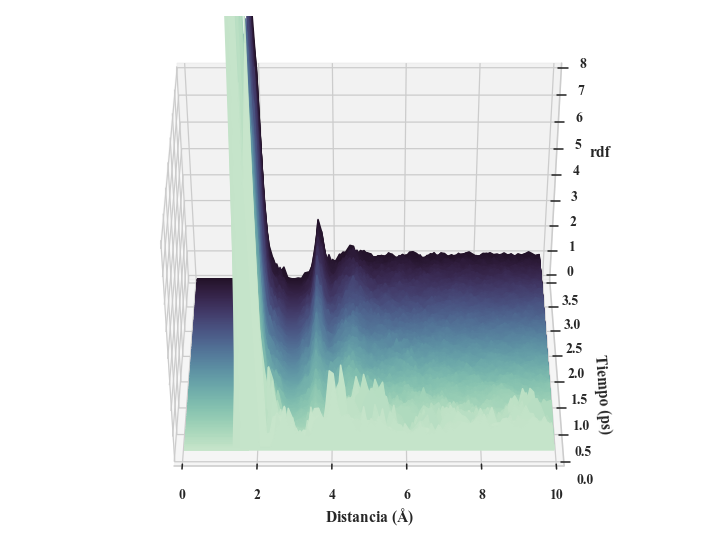

In [315]:
# Generate polygons with data
all_polygons = []

# Poligons are made by touples, the data is in the rdfs
for rdf in rdf_list:
    # Append polygon points of each value
    rdf_polygon_points=[]
    x = list(rdf.D)
    y = list(rdf.gr23)
    x.append(x[-1]+.1)
    y.append(0)
    # Do this as a touple plair
    for i in range(rdf.shape[0]+1):
        rdf_polygon_points.append((float(x[i]), float(y[i])))
    all_polygons.append(rdf_polygon_points)
                                  
# Chosse the colors
COLORS = sns.color_palette("ch:3.5,-.6,dark=.1", n_colors=len(zs))

# Create a 3d Figure
fig = plt.figure()
ax = fig.gca(projection='3d')       

# Use the polygon collection 
poly = PolyCollection(all_polygons,facecolors=COLORS, linewidth=1, edgecolor=COLORS)

# Add the characteristics of the plot
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('Distancia ($\\AA$)', fontsize=10)
ax.set_xlim3d(0,10)
ax.set_ylabel('Tiempo (ps)', fontsize=10)
ax.set_ylim3d(0, 3.5)
ax.set_zlabel('rdf',fontsize=10)
ax.set_zlim3d(0, 8)
ax.view_init(40,-90)

plt.tight_layout()

<IPython.core.display.Javascript object>


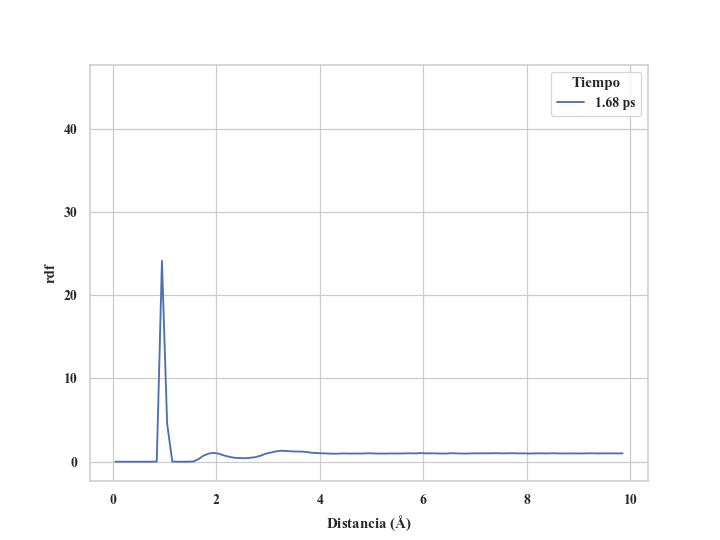

In [347]:
# Select an index
fdr = 0
fig=plt.figure()

# Plot the index
plot, = plt.plot(rdf_list[fdr].D, rdf_list[fdr].gr12, label=f'{round(200*12.0*0.7/1000,2)} ps')

# Compare to the values of literature
#plt.vlines(3.63,0,2, color='orange')
#plt.vlines(3.03,0,2, color='orange')
#plt.vlines(3.35,0,2, color='orange')

plt.legend(title='Tiempo')
plt.xlabel('Distancia ($\\AA$)')
plt.ylabel('rdf')
#plt.ylim(0,1.67)


times_mov = 1
def animate(i):
    plot.set_data (rdf_list[i].D, rdf_list[i].gr12)
    #ax.view_init(20,i/20)
    
ani = animation.FuncAnimation(fig, animate,interval=10, repeat=True)

plt.show()
#ani.save('basic_animation.mp4', fps=10)